# Рабочая тетрадь №6 Григорьев Максим Эдуардович КРБО-01-21

# 1.1.1 Задание
### ***Выполните по вариантам соответственно реализацию генетического алгоритма в соответствии с приложенными начальными данными.***

In [4]:
def qHrom(x,y):
    return (x-3*y+1)/(3*x**2+y**2+1)

def sumqHrom(Hrom):
    return sum(Hrom)

def exchangeScheme(oldX, oldY, sortedId):
    X = [0 for i in range(4)]
    Y = [0 for i in range(4)]
    
    X[2] = oldX[sortedId[2]]
    X[3] = oldX[sortedId[2]]
    
    X[0] = oldX[sortedId[0]]
    
    X[1] = oldX[sortedId[1]]
    
    Y[2] = oldY[sortedId[2]]
    Y[3] = oldY[sortedId[2]]
    
    Y[0] = oldY[sortedId[0]]
    
    Y[1] = oldY[sortedId[1]]

    return X, Y
    
def sorting(Hrom):
    sortedId = sorted(range(len(Hrom)), key = lambda k: Hrom[k])
    
    return sortedId

def evoStep(X,Y,Hrom):
    _, minId = min((value, id) for (id,value) in enumerate(Hrom))
    X = X[:]
    Y = Y[:]
    Hrom = Hrom[:]
    
    X.pop(minId)
    Y.pop(minId)
    Hrom.pop(minId)
    
    return X, Y, Hrom

def evoSteps(X,Y, stepsNum = 4):
    res=[]
    
    for i in range(4):
        arrHrom = [qHrom(x,Y[i]) for i,x in enumerate(X)]
        
        X, Y, Hrom = evoStep(X,Y, arrHrom)
        
        X, Y = exchangeScheme(X, Y, sorting(Hrom))
        
        res.append([X,Y,sumqHrom(arrHrom), arrHrom])
    return X, Y, res

X = [-2,-1,0,2]
Y = [-2,0,-1,1]

res = evoSteps(X,Y)
for i in range(len(res[2])):
    print(f'max_{i+1}_step: {res[2][i][2]}')
    
qualarrHrom = []
for i in range(len(res[2])):
    qualarrHrom += res[2][i][3]

print(f'max Hrom: {max(qualarrHrom)}')

max_1_step: 2.2941176470588234
max_2_step: 4.294117647058823
max_3_step: 6.294117647058823
max_4_step: 8.0
max Hrom: 2.0


# 1.2.1 Задание
### ***Найти длину гамильтонова цикла S4 в полном графе K6 после четырех циклов решения задачи методом отжига по вариантам ниже.***

Лучший выбранный маршрут: [1, 5, 3, 2, 4, 6, 1]
Его длина: 165
Длины всех рассмотренных маршрутов: [151, 138, 150, 166, 165]


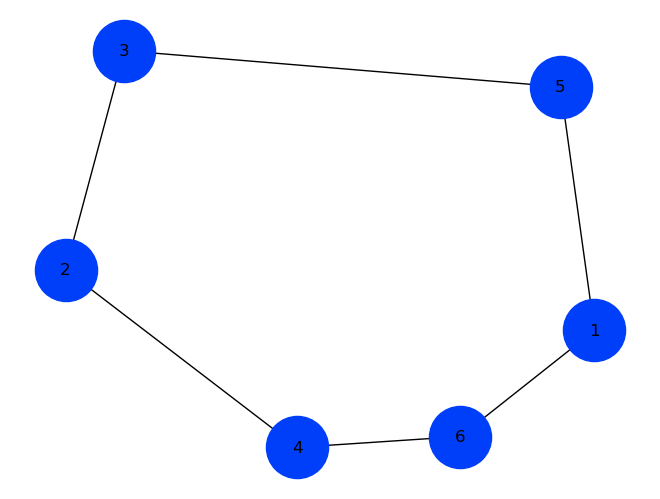

In [5]:
import networkx as nx
from math import e
#Var4

def probability(delta, T):
    return 100 * e ** (-delta / T)
 
def lowerTemp(T):
    newT = 0.5 * T
    return newT
 
def edgeLength(i, j, distances):
    return max([item[2] for item in distances if (i, j) == (item[:2]) or (j, i) == (item[:2])])
 
def routeLength(V, distances):
    edges = []
    
    for i in range(len(V)-1):
        edges.append(edgeLength(V[i], V[i + 1], distances))
        
    return sum(edges)
 
def routeOneReplacement(arrV, Z):
    arrV[Z[0] - 1], arrV[Z[1] - 1] = arrV[Z[1] - 1], arrV[Z[0] - 1]
    return arrV
 
def routeReplacement(V, Z):
    for z in Z:
        V = routeOneReplacement(V, Z)
    return V
 
def chooseRoute(distances, V, Z, T, P):
    Vlength = routeLength(V, distances)
    lengthArr = [Vlength]
    
    for i, z in enumerate(Z):
        newV = routeOneReplacement(V[:], z)
        newS = routeLength(newV, distances)
        lengthArr.append(newS)
        deltaS = newS - Vlength
        if deltaS <= 0 or probability(deltaS, T) > P[i]:
            V = newV
            Vlength = newS
            
        T = lowerTemp(T)
    return V, lengthArr
 
def drawRouteGraph(distances, bestRoute):
    newDistances = []
    
    for i in range(len(bestRoute) - 1):
        for distance in distances:
            if (bestRoute[i], bestRoute[i + 1]) == distance[:2] or (bestRoute[i + 1], bestRoute[i]) == distance[:2]:
                newDistances.append(distance)
    
    graph = nx.Graph()
    
    graph.add_weighted_edges_from(newDistances)
    
    nx.draw_kamada_kawai(graph, node_color = '#003FFA', node_size = 2000, with_labels = True)
distances = [(1,2,18),
            (1,3,41),
            (1,4,36),
            (1,5,29),
            (1,6,19),
            (2,3,27),
            (2,4,31),
            (2,5,37),
            (2,6,15),
            (3,4,29),
            (3,5,42),
            (3,6,23),
            (4,5,24),
            (4,6,17),
            (5,6,24),]
V = [1,3,4,5,6,2,1]
Z = [(2,4),(3,4),(4,6),(5,6)]
P = [63,49,45,53]
T = 100
 
bestRoute, lengthArr = chooseRoute(distances, V, Z, T, P)
 
print('Лучший выбранный маршрут:', bestRoute)
print('Его длина:', routeLength(bestRoute, distances))
print('Длины всех рассмотренных маршрутов:', lengthArr)
drawRouteGraph(distances, bestRoute)